In [ ]:
import h5py

with h5py.File('/UrbanSound8kMFCC.h5py', 'r') as hdf_file:
    # List all the datasets in the HDF5 file
    print("Datasets in the HDF5 file:", list(hdf_file.keys()))

    # Access the 'X' dataset
    X_dataset = hdf_file['X']

    # Access the 'y' dataset
    y_dataset = hdf_file['y']

    # Now, you can work with the datasets as NumPy arrays
    X_data = X_dataset[:]
    y_data = y_dataset[:]

    print("Shape of the 'X' dataset:", X_data.shape)
    print("Shape of the 'y' dataset:", y_data.shape)

Datasets in the HDF5 file: ['X', 'y']
Shape of the 'X' dataset: (8732, 40)
Shape of the 'y' dataset: (8732,)


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Normalize the input features
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

Epoch 1/50
175/175 [==============================] - 2s 6ms/step - loss: 0.6345 - accuracy: 0.7879 - val_loss: 0.6679 - val_accuracy: 0.7838
Epoch 2/50
175/175 [==============================] - 1s 4ms/step - loss: 0.6236 - accuracy: 0.7881 - val_loss: 0.6643 - val_accuracy: 0.7874
Epoch 3/50
175/175 [==============================] - 1s 4ms/step - loss: 0.6154 - accuracy: 0.7928 - val_loss: 0.6561 - val_accuracy: 0.7895
Epoch 4/50
175/175 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.7895 - val_loss: 0.6599 - val_accuracy: 0.7924
Epoch 5/50
175/175 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.7908 - val_loss: 0.6572 - val_accuracy: 0.7888
Epoch 6/50
175/175 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.7963 - val_loss: 0.6389 - val_accuracy: 0.7946
Epoch 7/50
175/175 [==============================] - 0s 3ms/step - loss: 0.6054 - accuracy: 0.7912 - val_loss: 0.6504 - val_accuracy: 0.7974
Epoch 

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               5248      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 14154 (55.29 KB)
Trainable params: 14154 (55.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


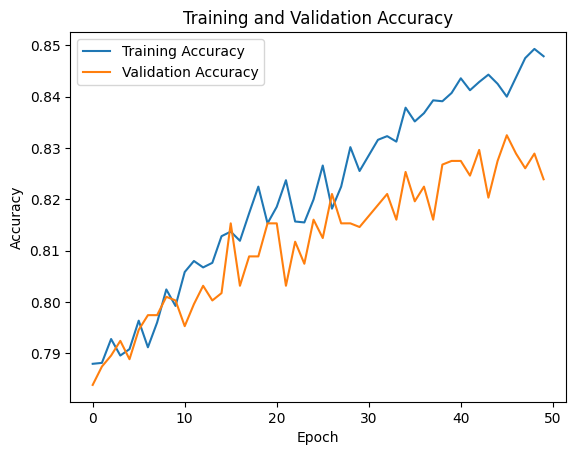

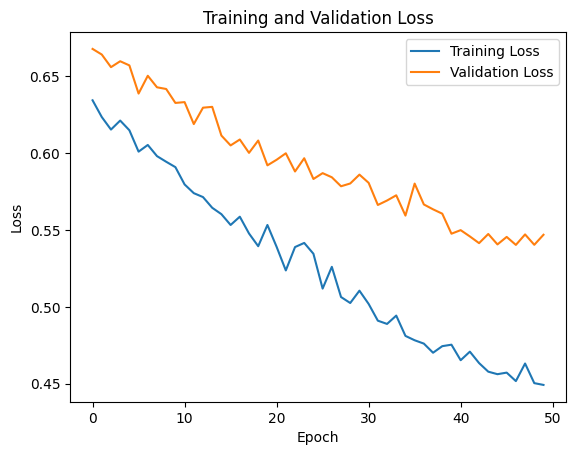

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import os
from sys import getsizeof
def get_file_size(file_path):
  size = os.path.getsize(file_path)
  return size
def convert_bytes(size,unit = None):
  if unit == 'KB':
     return print('File size:' + str(round(size/1024,3)) + 'KiloBytes')
  elif unit == 'MB':
     return print('File size:' + str(round(size/(1024*1024),3)) + 'MegaBytes')
  else:
     return print('File size:' + str(size) + 'Bytes')

In [ ]:
KERAS_MODEL_NAME = 'tf_model_audio_classification.h5py'

In [ ]:
model.save(KERAS_MODEL_NAME)

In [ ]:
convert_bytes(get_file_size(KERAS_MODEL_NAME),'MB')

File size:0.004MegaBytes


In [ ]:
keras_model_size = get_file_size(KERAS_MODEL_NAME)

In [ ]:
TF_LITE_MODEL_FILE_NAME = 'tf_lite_model.tflite'
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

In [ ]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name,"wb").write(tflite_model)
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME),"KB")

File size:57.352KiloBytes


In [ ]:
tflite_file_size = get_file_size(TF_LITE_MODEL_FILE_NAME)

In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:",input_details[0]['shape'])
print("Input Type:",input_details[0]['dtype'])
print("Output Shape:",output_details[0]['shape'])
print("Output Type:",output_details[0]['dtype'])

Input Shape: [ 1 40]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


In [ ]:
interpreter.resize_tensor_input(input_details[0]['index'],(1747,40))
interpreter.resize_tensor_input(output_details[0]['index'],(1747,10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:",input_details[0]['shape'])
print("Input Type:",input_details[0]['dtype'])
print("Output Shape:",output_details[0]['shape'])
print("Output Type:",output_details[0]['dtype'])

Input Shape: [1747   40]
Input Type: <class 'numpy.float32'>
Output Shape: [1747   10]
Output Type: <class 'numpy.float32'>


In [ ]:
X_test.dtype

dtype('float32')

In [ ]:
X_test.shape

(1747, 40)

In [ ]:
import numpy as np
X_test_numpy = np.array(X_test,dtype=np.float32)

In [ ]:
interpreter.set_tensor(input_details[0]['index'],X_test_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction result shape:",tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions,axis = 1)

Prediction result shape: (1747, 10)


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(prediction_classes,y_test)
print("Test accuracy TFLite model is: {}%".format(round(100*acc,2)))

Test accuracy TFLite model is: 84.66%


In [ ]:
tflite_file_size/keras_model_size

14.337890625